In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ = pd.read_excel("online_rfm.xlsx",
                    sheet_name="Year 2010-2011")

In [5]:
df_.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df = df_.copy()

In [8]:
df.describe().T # betimsel istatistiklerine eriştik.

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.552234,218.080957,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.611138,96.759765,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:
# eksik veri sorgulanması
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [10]:
df.count()

Invoice        541910
StockCode      541910
Description    540456
Quantity       541910
InvoiceDate    541910
Price          541910
Customer ID    406830
Country        541910
dtype: int64

In [11]:
# eşsiz değerleri sorguluyoruz
df["Invoice"].nunique()

25900

In [12]:
# iptal edilmiş değerler çıkartıldı.
df = df[~df["Invoice"].str.contains("C", na=False)]

In [13]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
df.isnull().sum()


Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    134697
Country             0
TotalPrice          0
dtype: int64

In [ ]:
# Eksik gözlemlerin silinmesi

In [16]:
df.dropna(inplace=True)

In [17]:
# betimsel istatistiklerine bakıyoruz tekrardan
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397925.0,13.021793,180.419984,1.0,2.00,6.00,12.00,80995.00
Price,397925.0,3.116212,22.096773,0.0,1.25,1.95,3.75,8142.75
Customer ID,397925.0,15294.308601,1713.172738,12346.0,13969.00,15159.00,16795.00,18287.00
TotalPrice,397925.0,22.394737,309.055200,0.0,4.68,11.80,19.80,168469.60


In [18]:
dff = df.copy()

In [19]:
# ülkelere göre ortalama gelirler.
dff.groupby("Country").agg({"TotalPrice": "mean"}).sort_values("TotalPrice", ascending=False).head(10)

,TotalPrice
Country,
Netherlands,120.798282
Australia,116.895620
Japan,116.561900
Singapore,95.852658
Sweden,85.096075
Denmark,49.882474
Lithuania,47.458857
Lebanon,37.641778
EIRE,36.687745


In [20]:
dff.groupby("Country").agg({"TotalPrice": "mean"}).sort_values("TotalPrice", ascending=False)

,TotalPrice
Country,
Netherlands,120.798282
Australia,116.895620
Japan,116.561900
Singapore,95.852658
Sweden,85.096075
Denmark,49.882474
Lithuania,47.458857
Lebanon,37.641778
EIRE,36.687745


In [21]:
dff.reset_index(inplace=True)

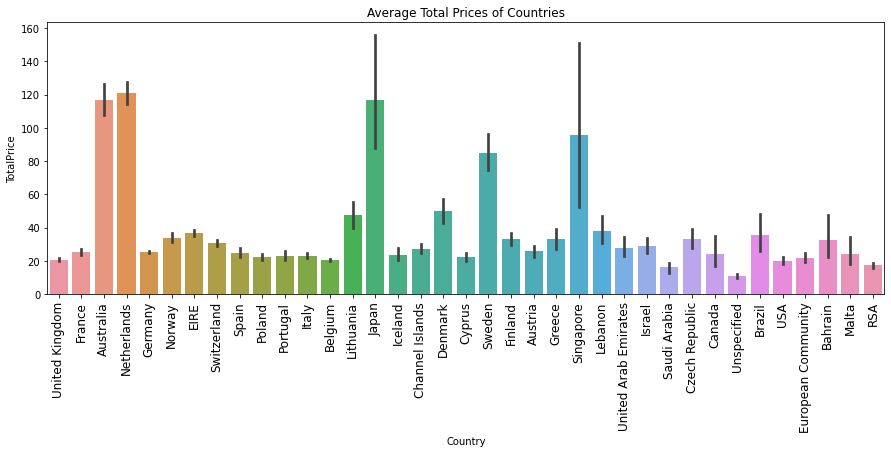

In [22]:
# Veri görselleştirme
def mean_price(DataFrame): 
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x='Country', y='TotalPrice', data=dff)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=12)
    plt.title("Average Total Prices of Countries")
mean_price(dff)

# RFM ANALYZE

In [23]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [61]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import squarify

In [27]:
today_date = dt.datetime(2011, 12, 11)

In [28]:
rfm_analyze = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: len(num),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [30]:
rfm_analyze

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [31]:
rfm_analyze.columns = ['Recency', 'Frequency', 'Monetary']
rfm_analyze

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [32]:
rfm_analyze = rfm_analyze[((rfm_analyze["Monetary"] > 0) & (rfm_analyze["Frequency"] > 0))]


In [34]:
rfm_analyze["RecencyScore"] = pd.qcut(rfm_analyze['Recency'], 5, labels=[5,4,3,2,1])

<ipython-input-34-e7448b1ae61b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analyze["RecencyScore"] = pd.qcut(rfm_analyze['Recency'], 5, labels=[5,4,3,2,1])


In [35]:
rfm_analyze["FrequencyScore"] = pd.qcut(rfm_analyze['Frequency'], 5, labels=[1,2,3,4,5])


<ipython-input-35-8684cf808655>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analyze["FrequencyScore"] = pd.qcut(rfm_analyze['Frequency'], 5, labels=[1,2,3,4,5])


In [36]:
rfm_analyze["MonetaryScore"] = pd.qcut(rfm_analyze["Monetary"], 5, labels =[1,2,3,4,5])


<ipython-input-36-b05b15fc08d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analyze["MonetaryScore"] = pd.qcut(rfm_analyze["Monetary"], 5, labels =[1,2,3,4,5])


In [38]:
rfm_analyze["RFM_SCORE"] = (rfm_analyze["RecencyScore"].astype('str')+ rfm_analyze["FrequencyScore"].astype('str') + rfm_analyze["MonetaryScore"].astype('str'))

<ipython-input-38-24104b45cecd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analyze["RFM_SCORE"] = (rfm_analyze["RecencyScore"].astype('str')+ rfm_analyze["FrequencyScore"].astype('str') + rfm_analyze["MonetaryScore"].astype('str'))


In [39]:
rfm_analyze["FrequencyScore"] = pd.qcut(rfm_analyze['Frequency'], 5, labels=[1,2,3,4,5]) 
rfm_analyze["MonetaryScore"] = pd.qcut(rfm_analyze["Monetary"], 5, labels =[1,2,3,4,5])

<ipython-input-39-9390db574b81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analyze["FrequencyScore"] = pd.qcut(rfm_analyze['Frequency'], 5, labels=[1,2,3,4,5])
<ipython-input-39-9390db574b81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analyze["MonetaryScore"] = pd.qcut(rfm_analyze["Monetary"], 5, labels =[1,2,3,4,5])


In [41]:
rfm_analyze.head(10)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,3,182,4310.00,5,5,5,555
12348.0,76,31,1797.24,2,3,4,234
12349.0,19,73,1757.55,4,4,4,444
12350.0,311,17,334.40,1,2,2,122
12352.0,37,85,2506.04,3,4,5,345
12353.0,205,4,89.00,1,1,1,111
12354.0,233,58,1079.40,1,3,4,134
12355.0,215,13,459.40,1,1,2,112


# RFM İSİMLENDİRMESİ;

In [42]:

seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [43]:
rfm_analyze['Segment'] = rfm_analyze['RecencyScore'].astype(str) + rfm_analyze['FrequencyScore'].astype(str)


<ipython-input-43-f032394e6711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analyze['Segment'] = rfm_analyze['RecencyScore'].astype(str) + rfm_analyze['FrequencyScore'].astype(str)


In [44]:
rfm_analyze['Segment'] = rfm_analyze['Segment'].replace(seg_map, regex=True)

<ipython-input-44-70f63196f6be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analyze['Segment'] = rfm_analyze['Segment'].replace(seg_map, regex=True)


In [45]:
rfm_analyze

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,Hibernating
12347.0,3,182,4310.00,5,5,5,555,Champions
12348.0,76,31,1797.24,2,3,4,234,At_Risk
12349.0,19,73,1757.55,4,4,4,444,Loyal_Customers
12350.0,311,17,334.40,1,2,2,122,Hibernating
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,Hibernating
18281.0,181,7,80.82,1,1,1,111,Hibernating
18282.0,8,12,178.05,5,1,1,511,New_Customers


In [46]:
rfm_analyze["RFM_SCORE"].unique() # unique rfm skor değerleri


array(['115', '555', '234', '444', '122', '345', '111', '134', '112',
       '445', '355', '524', '223', '544', '123', '511', '344', '334',
       '433', '522', '144', '255', '233', '423', '442', '244', '324',
       '455', '312', '245', '333', '323', '554', '133', '545', '235',
       '411', '322', '211', '422', '325', '533', '534', '222', '214',
       '155', '412', '121', '224', '331', '311', '421', '434', '343',
       '435', '512', '353', '321', '145', '413', '432', '225', '232',
       '535', '523', '543', '253', '114', '515', '335', '443', '231',
       '313', '212', '143', '514', '431', '213', '243', '124', '552',
       '414', '113', '454', '221', '424', '132', '513', '354', '532',
       '131', '453', '342', '341', '521', '541', '141', '142', '553',
       '531', '254', '215', '242', '332', '525', '153', '542', '315',
       '135', '154', '152', '125', '352', '252', '241', '314', '441',
       '452', '415', '425'], dtype=object)

In [47]:
rfm_analyze[rfm_analyze["RFM_SCORE"]=='543'] # en iyi musteriler


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12723.0,4,69,725.07,5,4,3,543,Champions
12784.0,10,59,574.42,5,4,3,543,Champions
13030.0,12,99,799.48,5,4,3,543,Champions
13077.0,2,112,729.27,5,4,3,543,Champions
13314.0,2,62,775.94,5,4,3,543,Champions
13546.0,13,98,626.99,5,4,3,543,Champions
13782.0,13,115,912.00,5,4,3,543,Champions
13822.0,6,96,632.00,5,4,3,543,Champions
13884.0,8,59,787.60,5,4,3,543,Champions


In [48]:
rfm_analyze[rfm_analyze["RFM_SCORE"]=='542']


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
14093.0,13,105,442.85,5,4,2,542,Champions
14452.0,11,62,264.44,5,4,2,542,Champions
14954.0,13,85,336.17,5,4,2,542,Champions
15054.0,13,114,302.10,5,4,2,542,Champions
15060.0,9,121,303.09,5,4,2,542,Champions
15471.0,3,77,469.48,5,4,2,542,Champions
16024.0,13,64,251.24,5,4,2,542,Champions
17221.0,8,63,335.13,5,4,2,542,Champions
17254.0,5,112,272.44,5,4,2,542,Champions


In [49]:
rfm_analyze[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])


Recency         Frequency           Monetary      
                           mean count        mean count         mean count
Segment                                                                   
About_to_Sleep        53.192547   322   15.987578   322   450.997174   322
At_Risk              166.435852   569   56.859402   569   996.916872   569
Cant_Loose           144.226190    84  181.666667    84  2370.705012    84
Champions              6.400990   606  289.031353   606  6960.915446   606
Hibernating          210.251397  1074   13.589385  1074   536.535672  1074
Loyal_Customers       34.206854   817  157.116279   817  2845.732852   817
Need_Attention        52.985366   205   41.736585   205   856.195854   205
New_Customers          7.421053    57    7.578947    57  3618.697018    57
Potential_Loyalists   16.668699   492   34.945122   492   915.486994   492
Promising             23.437500   112    7.767857   112   429.433929   112

In [51]:
dff2 = rfm_analyze[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg("count")

In [52]:
dff2.reset_index(inplace=True)

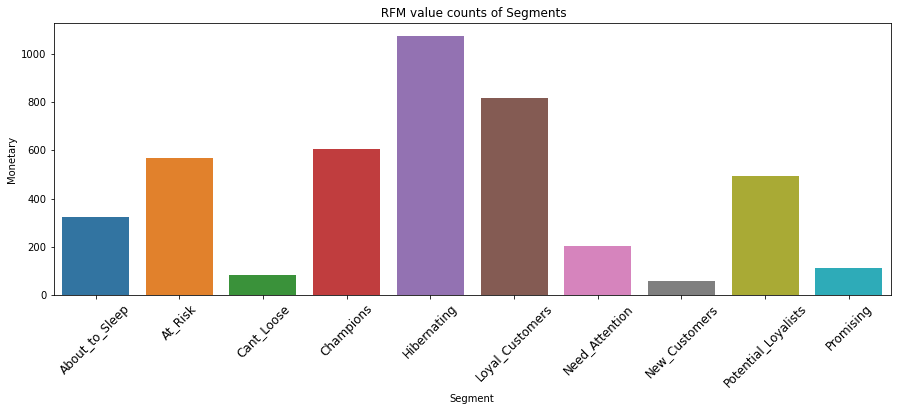

In [53]:
def count_rfm(DataFrame): 
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x='Segment', y='Monetary', data=dff2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=12)
    plt.title(" RFM value counts of Segments")
count_rfm(dff2)

In [55]:
dff3 = rfm_analyze[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg("mean")

In [56]:
dff3.reset_index(inplace=True)

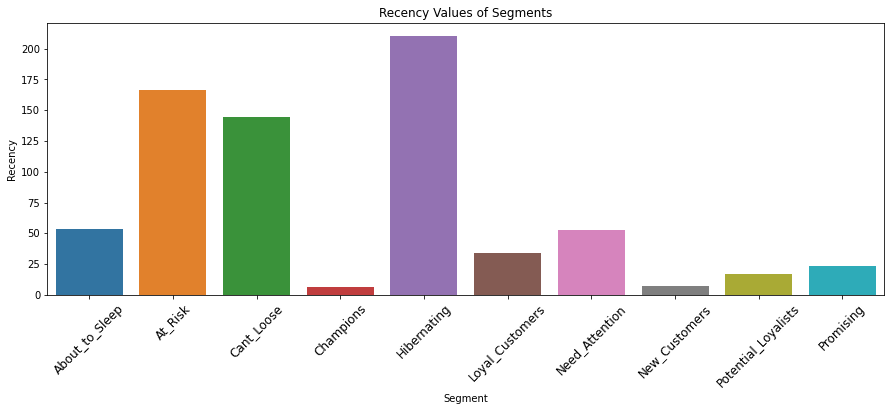

In [57]:
def mean_recency(DataFrame): # her segmentin ortalama recency değerleri 
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x='Segment', y='Recency', data=dff3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=12)
    plt.title("Recency Values of Segments")
mean_recency(dff3)

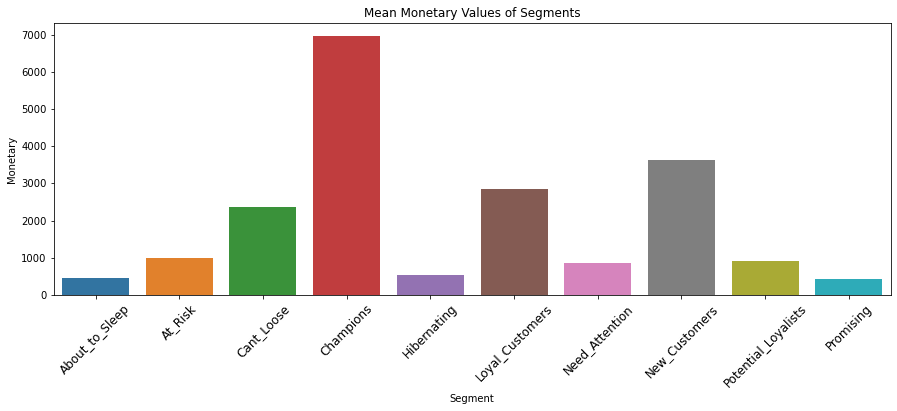

In [58]:
def mean_monetary(DataFrame): # her segmentin ortalama monetary değerleri 
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x='Segment', y='Monetary', data=dff3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=12)
    plt.title("Mean Monetary Values of Segments")
mean_monetary(dff3)

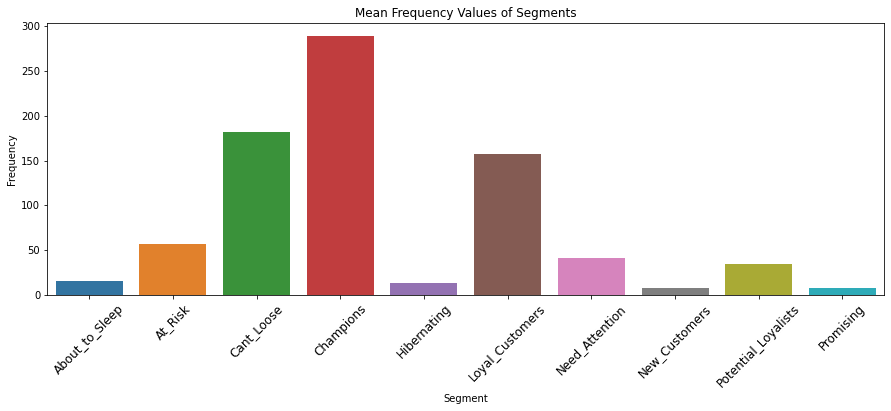

In [59]:
def mean_frequency(DataFrame): #her segmentin ortalama frequency değerleri
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x='Segment', y='Frequency', data=dff3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=12)
    plt.title("Mean Frequency Values of Segments")
mean_frequency(dff3)

In [60]:
!pip install squarify


In [62]:
kare_rfm = rfm_analyze.copy()

In [63]:
kare_rfm.reset_index(inplace=True)

In [64]:
kare_rfm.columns

Index(['Customer ID', 'Recency', 'Frequency', 'Monetary', 'RecencyScore',
       'FrequencyScore', 'MonetaryScore', 'RFM_SCORE', 'Segment'],
      dtype='object')

In [65]:
kare_rfm = kare_rfm.groupby("Segment")["Customer ID"].nunique().sort_values(ascending=False).reset_index()

In [67]:
cmap = matplotlib.cm.Oranges_r
mini = min(kare_rfm["Customer ID"])
maxi = max(kare_rfm["Customer ID"])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

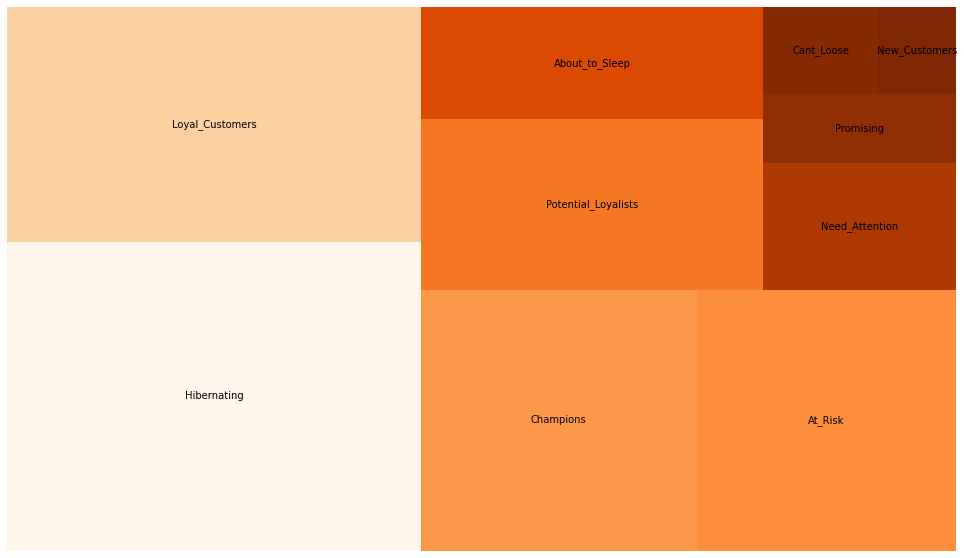

In [68]:
colors = [cmap(norm(value)) for value in kare_rfm['Customer ID']]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(17,10)
squarify.plot(sizes = kare_rfm['Customer ID'], color = colors, label = kare_rfm['Segment'], alpha=1)
plt.axis('off')
plt.show()